___
<a href='https://cafe.naver.com/jmhonglab'><p style="text-align:center;"><img src='https://lh3.googleusercontent.com/lY3ySXooSmwsq5r-mRi7uiypbo0Vez6pmNoQxMFhl9fmZJkRHu5lO2vo7se_0YOzgmDyJif9fi4_z0o3ZFdwd8NVSWG6Ea80uWaf3pOHpR4GHGDV7kaFeuHR3yAjIJjDgfXMxsvw=w2400'  class="center" width="50%" height="50%"/></p></a>
___
<center><em>Content Copyright by HongLab, Inc.</em></center>

# 그래프 그리기

### [Matplotlib의 기본적인 사용 방법](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

파이썬에서 그래프를 그릴때 가장 흔하게 사용되는 Matplotlib의 기본적인 사용 방법을 알아보겠습니다. 설치는 ```pip install matplotlib```로 간단히 할 수 있습니다.

MatplotLib을 사용할 때는 두 가지 스타일 중 하나를 선택할 수 있습니다. 

1. PyPlot 스타일: 모든 것을 다 plt를 통해서 합니다. 아주 간단한 그래프를 빠르게 그려볼 때 사용할 수 있습니다.

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

plt.figure()
plt.plot(x, y, label="data")
plt.xlabel("x label")
plt.ylabel("y label")
plt.title("Simple Plot")
plt.legend()
plt.show()


2. OO(Object-Oriented) 스타일: figure와 axes의 객체를 만들고 메써드를 호출해서 어떻게 그려질 지를 조절

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

fig, ax = plt.subplots()
ax.plot(x, y, label="data")
ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.set_title("Simple Plot")
ax.legend()

plt.show()  # 스크립트 모드에서는 필수


대부분의 경우 자동으로 보기 좋은 설정을 만들어줍니다. 그러나 논문 같은 전문 출판물에 넣을 그래프를 그릴 때는 데이터의 특징에 맞도록 세세하게 조절을 해줘야겠지요. 공식 문서의 [Parts of a Figure](https://matplotlib.org/stable/tutorials/introductory/usage.html#parts-of-a-figure)는 그래프 안에서 어떤 것들을 조절할 수 있는지 보여줍니다. 예시) [Spines](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch.set_linestyle), [grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html), [ticks](https://predictablynoisy.com/matplotlib/gallery/ticks_and_spines/major_minor_demo.html), 등

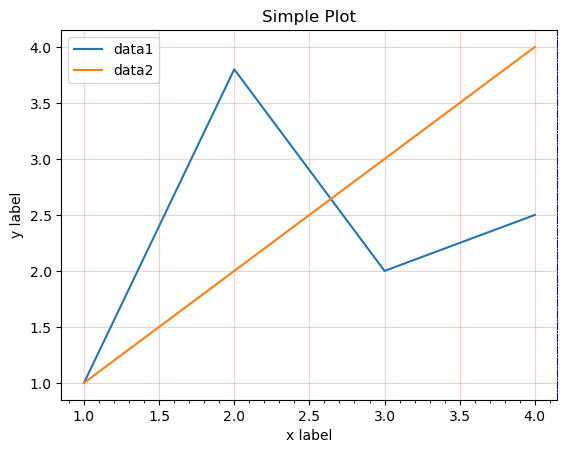

In [1]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y1 = [1, 3.8, 2, 2.5]
y2 = [1, 2, 3, 4]

fig, ax = plt.subplots()

ax.plot(x, y1, label="data1")
ax.plot(x, y2, label="data2")

ax.set_xlabel("x label")
ax.set_ylabel("y label")

ax.set_title("Simple Plot")

ax.legend()

ax.grid(color="red", alpha=0.2)  # ax.grid()

ax.spines["right"].set_color("blue")
ax.spines["right"].set_linestyle("-.")

# Major/minor ticks
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_formatter(FormatStrFormatter("%1.1f"))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

plt.show()  # 스크립트 모드에서는 필수


한 Figure 안에 여러개의 그래프(subplot)을 그릴 수 있습니다.

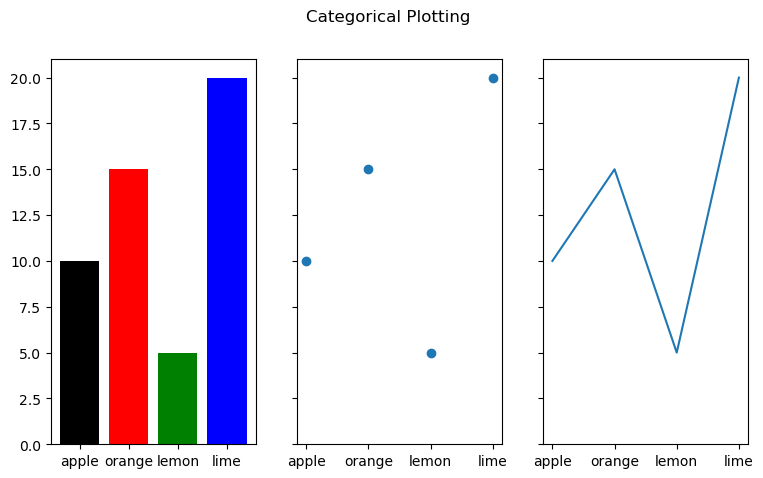

In [2]:
import matplotlib.pyplot as plt

data = {"apple": 10, "orange": 15, "lemon": 5, "lime": 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 5), sharey=True)

axs[0].bar(names, values, color=["black", "red", "green", "blue", "cyan"])
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle("Categorical Plotting")

plt.show()


Subplot들을 더 자유롭게 배치할 수도 있습니다.

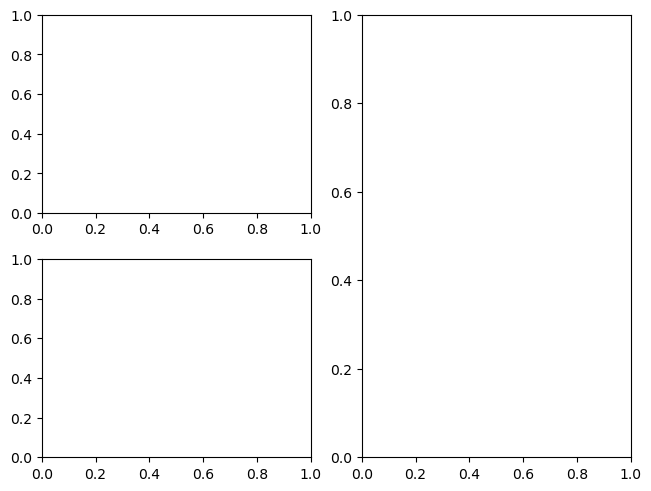

In [3]:
import matplotlib.pyplot as plt

fig, axd = plt.subplot_mosaic(
    [["upleft", "right"], ["lowleft", "right"]], layout="constrained"
)


plt.show()


[파이 차트](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py)도 간단히 그릴 수 있습니다.

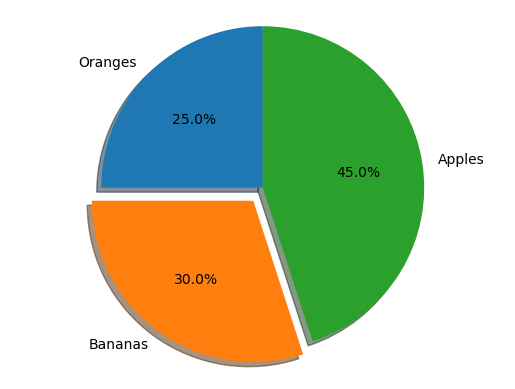

In [11]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["Oranges", "Bananas", "Apples"]  # 각 데이터의 이름
sizes = [25, 30, 45]  # 데이터의 크기
explode = (0, 0.1, 0)  # 경계로부터 떨어진 거리

fig, ax = plt.subplots()

ax.pie(
    sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90
)

ax.axis("equal")

plt.show()


그 외의 다양한 그래프들은 [갤러리](https://matplotlib.org/stable/gallery/index.html)를 참고하세요.

##### [실습] CSV 파일에서 읽어온 데이터 그려보기

[비트코인 가격 데이터](https://finance.yahoo.com/quote/BTC-USD/history?period1=1410825600&period2=1645142400&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true)를 빈도(Frequency)는 월별(Monthly), 기간(Time Period)은 최대(Max)로 적용(Apply) 후 다운로드(Download) 합니다.
- 첫 줄은 그래프 그릴 때 사용하지 않습니다.
- 날짜(Date)에서 2014-01와 같이 일(day)를 삭제해서 길이를 줄였습니다.
- 수치 데이터는 읽어들인 후 자료형을 바꿔줘야 그릴 수 있습니다.
- ```MultipleLocator(20)```를 사용했습니다.

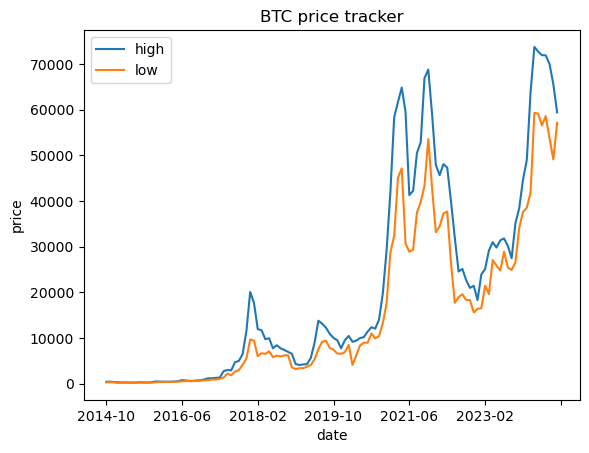

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import csv

# 데이터 가져오기
with open("BTC-USD.csv", "r") as f:
    rdr = csv.reader(f)
    dates = []
    highs = []
    lows = []
    f.readline()
    for line in rdr:
        dates.append(line[0])
        highs.append(line[2])
        lows.append(line[3])

# 자료정리: 자료는 모두 문자열임. 원하는 데이터로 형변환할 것
dates = list(map(lambda x: x[:-3], dates))  # 뒤의 일자 제거
highs = list(map(lambda x: float(x), highs))
lows = list(map(lambda x: float(x), lows))

# 마지막 데이터 삭제
del dates[-1]
del highs[-1]
del lows[-1]

# # 그래프 그리기
fig, ax = plt.subplots()

ax.plot(dates, highs, label="high")
ax.plot(dates, lows, label="low")

ax.set_xlabel("date")
ax.set_ylabel("price")

ax.set_title("BTC price tracker")

ax.legend()

# # ax.grid(color="red", alpha=0.2)  # ax.grid()

# # ax.spines["right"].set_color("blue")
# # ax.spines["right"].set_linestyle("-.")

# # Major/minor ticks


ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.xaxis.set_major_formatter(FormatStrFormatter("%1.1f"))
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))


{'Date': '2014-10-01', 'Open': '387.427002', 'High': '411.697998', 'Low': '289.295990', 'Close': '338.321014', 'Adj Close': '338.321014', 'Volume': '902994450'}


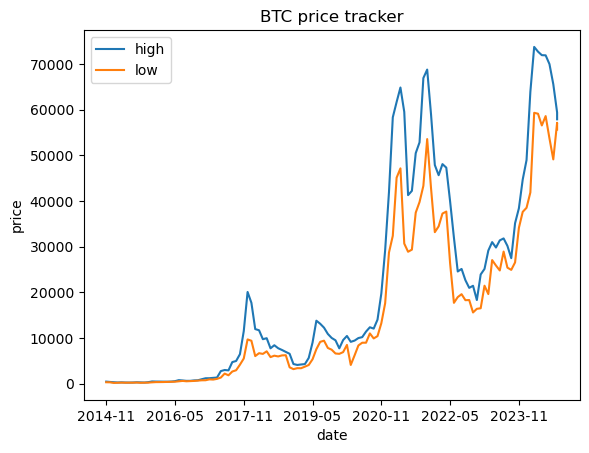

In [33]:
""" 좀더 간단한 버전 """

import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

dates = []
highs = []
lows = []

with open("BTC-USD.csv") as f:
    r = csv.DictReader(f, delimiter=",")  # 사전형식으로 파일을 읽어옴

    # 한줄씩 출력하기
    for row in r:
        print(row)
        break

    for row in r:
        dates.append(row["Date"])
        highs.append(row["High"])
        lows.append(row["Low"])

# 자료 정리
dates = list(map(lambda x: x[:-3], dates))
highs = list(map(lambda x: float(x), highs))
lows = list(map(lambda x: float(x), lows))

# 그래프 그리기
fig, ax = plt.subplots()

ax.plot(dates, highs, label="high")
ax.plot(dates, lows, label="low")

ax.set_xlabel("date")
ax.set_ylabel("price")

ax.set_title("BTC price tracker")

ax.legend()
ax.xaxis.set_major_locator(MultipleLocator(18))


##### [실습] 몬테 카를로 시뮬레이션으로 원주율 구하기

난수를 이용해서 원주율의 근사값을 계산해봅시다.

**스텝1** ```random.uniform()```을 이용해서 그림과 같은 범위의 상자를 채우는 2차원 산포도(scatter plot)를 그려봅시다. 이때 중심이 원점에 있고 반지름이 1.0인 원 안에 들어가는 점들은 빨간색으로 그렇지 않은 점들은 파란색으로 그려봅시다. 어떤 점의 좌표가 $(x, y)$라고 할 때 $x^2 + y^2 <= 1.0$을 만족하면 원 안에 들어간 것입니다. 점의 개수는 변수 ```num_points```를 이용하여 바꿀 수 있게 합시다.

**스텝2** 4.0 x (원 안에 들어간 점들의 개수)/```num_points```가 원주율의 근사치입니다.

num_points를 키울 수록 실제 원주율 3.141592에 가까워집니다.

**힌트** 예를 들어서 (1, 3), (5, 2) 같은 두 개의 점을 ```ax.scatter()```로 그릴 때는 ```ax.scatter([1, 5], [3, 2])``` 와 같이 x좌표는 x좌표끼리 모으고 y좌표는 y좌표끼리 모아야 점을 찍으실 수 있습니다.

3.12884


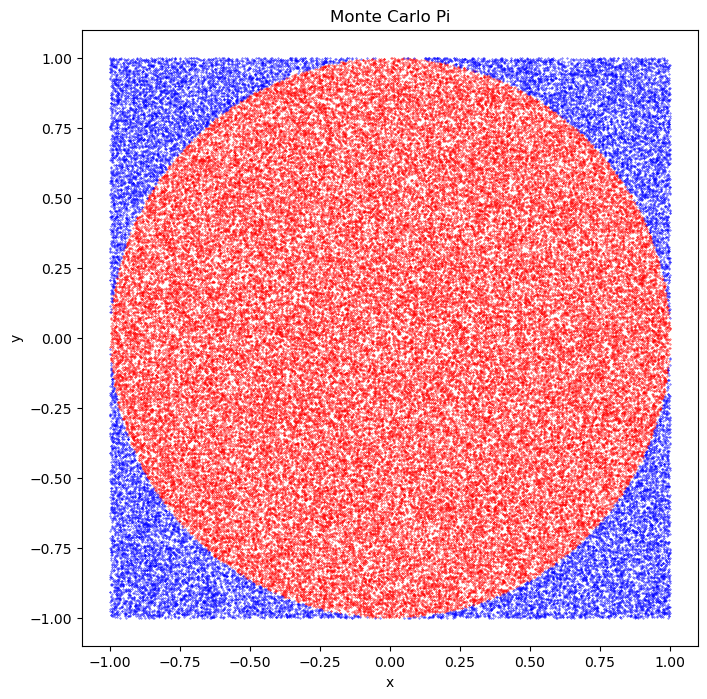

In [49]:
import random
import matplotlib.pyplot as plt

random.seed(0)  # 결과 비교를 위해 시드 고정

# 데이터 생성
num_points = 100000
in_x, in_y = [], []
out_x, out_y = [], []
count = 0

for i in range(num_points):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)

    if x**2 + y**2 <= 1:
        in_x.append(x)
        in_y.append(y)
        count += 1
    else:
        out_x.append(x)
        out_y.append(y)

print(4 * count / num_points)

# 3.12884

# 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Monte Carlo Pi")

# 그래프에 데이터 넣기
ax.scatter(in_x, in_y, c="red", s=0.1)
ax.scatter(out_x, out_y, c="blue", s=0.1)

plt.show()


### [Seaborn](https://seaborn.pydata.org/) 소개

Seaborn은 Matplotlib을 적은 코드로 더 보기 좋게 사용할 수 있도록 도와줍니다. 

```pip install seaborn```

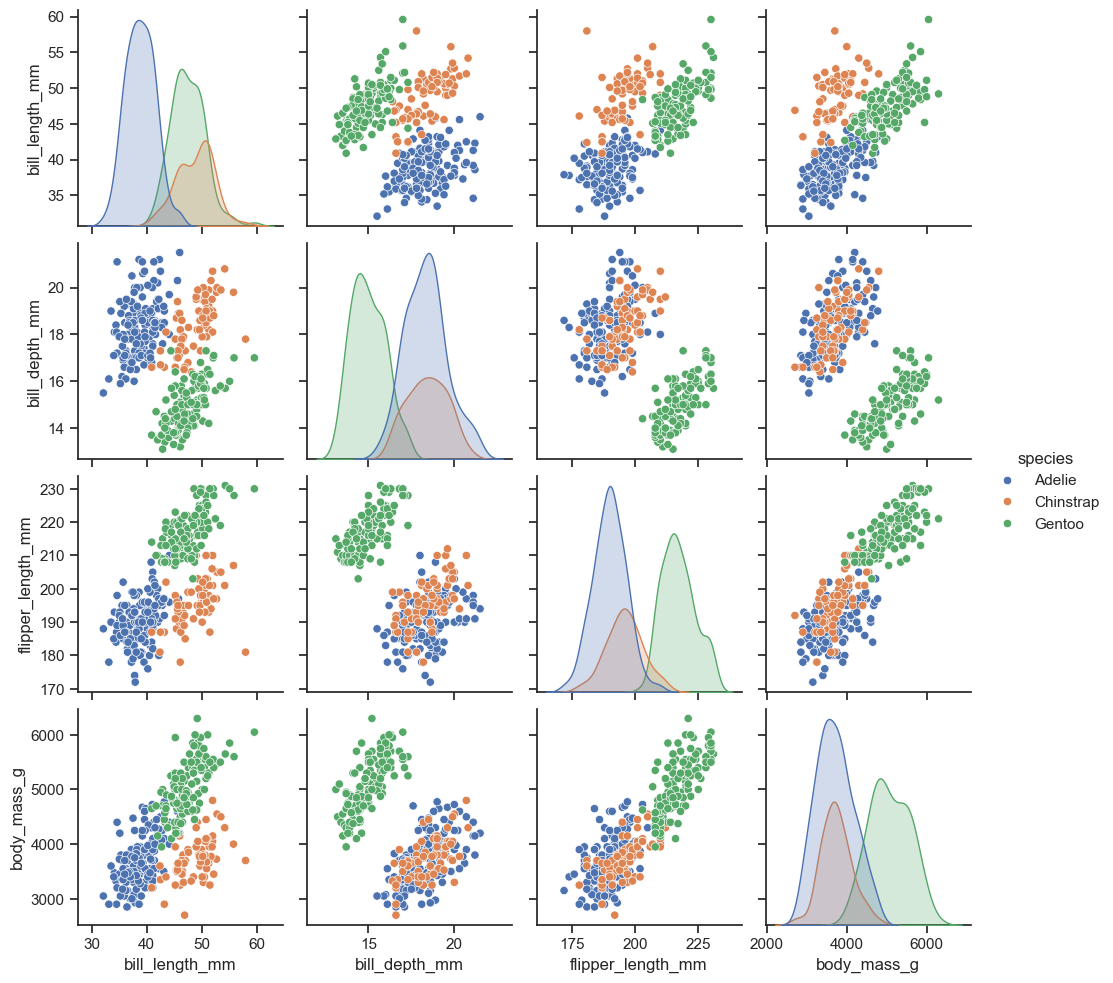

In [50]:
import seaborn as sns

sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")


##### [Bokeh](https://bokeh.org/) 소개

그래프와 상호작용을 할 수 있습니다. 웹브라우저가 기본이며 [주피터 노트북용 예제](https://docs.bokeh.org/en/2.4.0/docs/gallery.html#notebook-examples)는 여기를 참고하세요.


##### [Folium](https://python-visualization.github.io/folium/) 소개

지도 위에 정보를 표시할 때 사용합니다. 위도와 경도는 구글맵에서 찾을 수 있습니다.

```pip install folium```

In [53]:
import folium

f = folium.Figure(width=500, height=500)
m = folium.Map(location=[37.14, 127.02], zoom_start=8).add_to(f)

f
